<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [32]:
names = [
          "airplane",									
          "automobile",							
          "bird",				
          "cat",								
          "deer",									
          "dog",									
          "frog",										
          "horse",										
          "ship",									
          "truck"
]

9


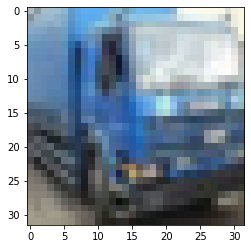

In [33]:
#上次mlp.ipynb的內容是： mnist數據集裡y_train：(60000, )[5,2,1,0]
'''
minist y_train 的shape是（60000，），cifar的y_train shape 是（50000，1）
mnist (60000, ) ---> [5, 2, 1, 0, ......]
cifao10 (50000, 1) ---> [[5], [2], [1], [0], ......]
'''
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(y_train[idx][0])
plt.imshow(x_train[idx])



In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D #Convolution 2D
from tensorflow.keras.layers import Dense, Flatten,Dropout#flatten平坦化（也就是攤開來3個數字相乘起來）
layers = [
          # 3 * 3 * 3(一個) ＊64 + 64(bias)=1792
          Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
          MaxPooling2D(),
          # 3 * 3 * 64(一個) ＊128 + 128(bias)=73856
          Conv2D(128, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Conv2D(256, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Conv2D(512, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Flatten(),
          Dense(32, activation="relu"),
          # 128 * 10 + 10(bias) = 1290
          Dropout(0.25),#避免過度依賴某個神經元，所以加在dense之間（accuracy準確率不一定上升）
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 512)        

In [35]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy#可節省ram的使用
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])
'''
onehot做完
3 -> [0,0,0,1,0,0,0,0....]
而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多
但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案
'''

'\nonehot做完\n3 -> [0,0,0,1,0,0,0,0....]\n而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多\n但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案\n'

In [36]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 5s - loss: 1.9694 - accuracy: 0.2640 - val_loss: 1.5005 - val_accuracy: 0.4468
Epoch 2/100
225/225 - 4s - loss: 1.5180 - accuracy: 0.4444 - val_loss: 1.2147 - val_accuracy: 0.5608
Epoch 3/100
225/225 - 4s - loss: 1.2939 - accuracy: 0.5265 - val_loss: 1.1025 - val_accuracy: 0.6108
Epoch 4/100
225/225 - 4s - loss: 1.1405 - accuracy: 0.5849 - val_loss: 0.9434 - val_accuracy: 0.6744
Epoch 5/100
225/225 - 4s - loss: 1.0188 - accuracy: 0.6316 - val_loss: 0.8598 - val_accuracy: 0.7060
Epoch 6/100
225/225 - 4s - loss: 0.9316 - accuracy: 0.6674 - val_loss: 0.8211 - val_accuracy: 0.7252
Epoch 7/100
225/225 - 4s - loss: 0.8388 - accuracy: 0.7022 - val_loss: 0.7827 - val_accuracy: 0.7452
Epoch 8/100
225/225 - 4s - loss: 0.7462 - accuracy: 0.7343 - val_loss: 0.7506 - val_accuracy: 0.7512
Epoch 9/100
225/225 - 4s - loss: 0.6631 - accuracy: 0.7627 - val_loss: 0.7496 - val_accuracy: 0.7568
Epoch 10/100
225/225 - 4s - loss: 0.5993 - accuracy: 0.7825 - val_loss: 0.7413 - val_accura

In [38]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.7559


[0.7740715146064758, 0.7559000253677368]

In [39]:
print(y_test.shape)#二維
print(pre.shape)#一維
# -1:叫他幫你算10000*1 = -1(?)，所以重新shape他
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)


NameError: ignored

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])